# 2. 벡터의 확장 개념에 대하여 

### (vector set, linear weighted combination, linearly independent, subspace, basis vector)

### [학습 전 필요 라이브러리 import 및 설정]

In [2]:
%pip install plotly
%pip install --upgrade plotly
%pip install nbformat
%pip install --upgrade nbformat

import numpy as np
import matplotlib.pyplot as plt

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
import plotly.graph_objects as go
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # print figures in svg format
plt.rcParams.update({'font.size':14}) # set global font size

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 1) 선형 가중 결합 : linear weighted combinations

선형 가중 결합의 경우에는 여러 변수마다 가중치(coefficient)를 다르게 주어 정보를 혼합하는 방법을 의미한다.

용어적으로는 "linear mixture" or "weighted combination" 이라고 칭한다.

어려운 용어 같지만 계산 방법은 scalar-vector multiplication 이후 전체를 더하는 연산이다.

In [11]:
# scalar 값 선언
l1 = 1
l2 = 2
l3 = -3

# vector 값 선언(차원이 없는 리스트 형태)
v1 = np.array([4,5,1])
v2 = np.array([-4,0,-4])
v3 = np.array([1,3,2])

# linear weighted combination 진행
result = l1*v1 + l2*v2 + l3*v3
print(result)

[ -7  -4 -13]


## 2) 기저 벡터와 점 : Basis vectors and points

기저는 matrix 정보를 설졍하는데 사용되는 집합을 의미한다. 하단의 그래프에서는 데카르트 기준 집합과 벡터 기저 집합을 모두 그래프에 구현하고  

어떤 기저값이 더 점을 설명하는데 간결하고 직관적인지를 시각적으로 보여준다

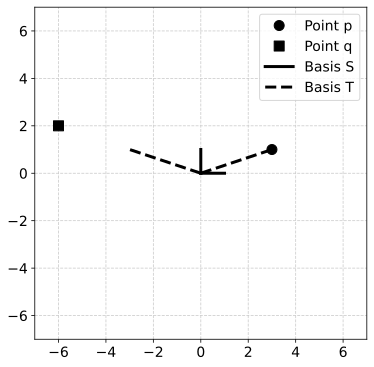

In [4]:
# 점 생성 (데카르트 좌표계, cartesian coordinates)
p = (3,1)
q = (-6,2)

# 그래프 사이즈 지정
plt.figure(figsize=(6,6))

# point p, q 그리기
plt.plot(p[0],p[1],'ko',markerfacecolor='k',markersize=10,label='Point p')
plt.plot(q[0],q[1],'ks',markerfacecolor='k',markersize=10,label='Point q')

# basis vector (S:데카르트 기준 집합, T:벡터 기저 집합)
plt.plot([0,0],[0,1],'k',linewidth=3,label='Basis S')
plt.plot([0,1],[0,0],'k',linewidth=3)

plt.plot([0,3],[0,1],'k--',linewidth=3,label='Basis T')
plt.plot([0,-3],[0,1],'k--',linewidth=3)

# 그래프 그리기
plt.axis('square')
plt.grid(linestyle='--',color=[.8,.8,.8])
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.savefig('Figure_02_04.png',dpi=300)
plt.show()

# [Exercises]

# Exercise 1 : 선형 가중 결합의 구현

기존 선형 가중 결합 구현 방법과 zip() 함수를 활용하여 선형 가중 결합을 구현한 방법의 결과물이 서로 동일한 벡터, 스칼라 값을 활용할 경우

값의 차이가 존재하는지 확인하는 코드로 결과를 확인해보면, 결과가 차이없이 동일하게 나오는 것을 확인 가능하다

In [16]:
# 기존 선형 가중 결합 방식의 코드
# scalar 값 선언
l1 = 1
l2 = 2
l3 = -3

# vector 값 선언(차원이 없는 리스트 형태)
v1 = np.array([4,5,1])
v2 = np.array([-4,0,-4])
v3 = np.array([1,3,2])

# linear weighted combination 진행
result = l1*v1 + l2*v2 + l3*v3

# zip() 함수를 이용한 선형 가중 결합 구현
# 리스트 내에 스칼라 값과 벡터값을 원소로 넣고 생성
scalars = [ l1,l2,l3 ]
vectors = [ v1,v2,v3 ]

# 출력 벡터값을 초기화 진행
linCombo = np.zeros(len(v1))

# zip() 함수와 for문을 활용하여 선형 가중 결합을 구현
for s,v in zip(scalars,vectors):
  linCombo += s*v

# zip() 활용 방법과 기존 선형 가중 결합 방법의 차이를 확인
print(f"zip() 함수 활용 선형 가중 결합 결과 : \n {linCombo} \n")
print(f"기존 수식 활용 선형 가중 결합 결과 : \n {result} \n")

zip() 함수 활용 선형 가중 결합 결과 : 
 [ -7.  -4. -13.] 

기존 수식 활용 선형 가중 결합 결과 : 
 [ -7  -4 -13] 



# Exercise 2 : 스칼라의 차원이 벡터 차원보다 많을 경우 선형 가중 결합의 가능성을 확인

In [21]:
# 기존의 스칼라보다 값을 하나 더 추가해서 4차원으로 바꿀 경우 정상적으로 동작하는지 확인
scalars = [ l1,l2,l3,5 ]
vectors = [ v1,v2,v3 ]

linCombo = np.zeros(len(v1))

for i in range(len(scalars)): # 결론적으로, 스칼라의 차원이 벡터의 차원보다 많을 경우에는 선형 가중 결합이 불가능하기 때문에 오류가 발생함을 확인 가능하다.
  linCombo += scalars[i]*vectors[i]


IndexError: list index out of range

# Exercise 3 : 2차원에 하나의 기저 벡터를 활용하여 표현 가능한 랜덤 점 100개를 생성 후 3차원에서 기저 벡터 2개를 활용하여 그래플로 각각 표기

## 1) 2차원 그래프 위에 랜덤 점 표기

기저벡터 [1, 3]을 활용하여 표현 가능한 점을 100개를 생성하여 그래프에 표기

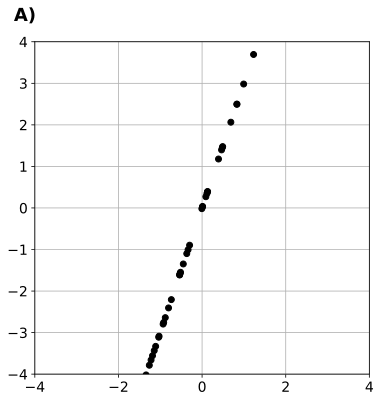

In [26]:
# 기저벡터 생성
A  = np.array([ 1,3 ])

# x값 범위 지정
xlim = [-4,4]

# 랜덤한 점 100개를 생성 
scalars = np.random.uniform(low=xlim[0],high=xlim[1],size=100)

# 그래프 범위 지정
plt.figure(figsize=(6,6))

# 랜덤으로 생성한 점 100개를 각각 반복
for s in scalars:

  # 선형 가중 결합을 통해 생성된 점이 기저벡터가 span하는 영역에 위치하도록 좌표값 조정
  p = A*s

  # 그래프에 표기
  plt.plot(p[0],p[1],'ko')


# 그래프 그리기
plt.xlim(xlim)
plt.ylim(xlim)
plt.grid()
plt.text(-4.5,4.5,'A)',fontweight='bold',fontsize=18)
plt.savefig('Figure_02_07a.png',dpi=300)
plt.show()

## 2) 3차원 그래프에 랜덤 점 표기

기존의 범위에 맞게 -4 ~ 4 사이의 랜덤 점을 생성하여 3차원 그래프에 맞게 2개의 기저 벡터값을 기준으로 span하는 공간 내에 점들이 위치하도록 선형 가중 결합을 이용하여 좌표값을 조정한 후 그래프를 확인

결과를 보면 basis vector 2개가 span하는 3차원 내 2차원 평면 내에 랜덤 점들이 선형 가중 결합을 통해 위차하도록 조정되어 그래프로 보여지는 결과를 확인이 가능하다.



In [32]:
# 3차원 공간 그래프 표기를 plotly 라이브러리 활용
import plotly.graph_objects as go

# 3차원에 존재하는 2개의 기저 벡터를 생성
v1 = np.array([ 3,5,1 ])
v2 = np.array([ 0,2,2 ])

# 3차원에 랜덤한 점을 -4 ~ 4 사이의 값으로 출력
scalars = np.random.uniform(low=xlim[0],high=xlim[1],size=(100,2))

# 랜덤한 점을 생성
points = np.zeros((100,3)) #점의 좌표값을 저장할 points를 생성하여 초기화 진행
for i in range(len(scalars)): # 생성한 모든 random 점을 하나씩 반복

  # 두 벡터의 선형 가중 결합을 통해 두 기저 벡터가 span하는 공간 내에서 존재하도록 point의 좌표값을 조정하여 points에 하나씩 저장
  points[i,:] = v1*scalars[i,0] + v2*scalars[i,1]


# 모든 저장된 points의 점을 그래프에 출력
fig = go.Figure( data=[go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], 
                                    mode='markers', marker=dict(size=6,color='black') )])

fig.update_layout(margin=dict(l=0,r=0,b=0,t=0))
plt.savefig('Figure_02_07b.png',dpi=300)
fig.show()

<Figure size 640x480 with 0 Axes>